In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets  import  load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [3]:
iris=load_iris()
X=iris.data
Y=iris.target
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2,random_state=5)

In [4]:
print(X.shape)

(150, 4)


In [5]:
model= KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, Y_train)
print('train scor', model.score(X_train,Y_train))
print('train scor', model.score(X_test,Y_test))

train scor 0.9833333333333333
train scor 0.9666666666666667


In [6]:
cross_val_score(KNeighborsClassifier(),X_train,Y_train,cv=5, scoring='accuracy').mean()

0.9833333333333334

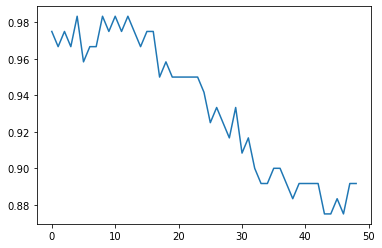

In [7]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,Y_train,cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

In [8]:
moedl= KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score= validation_curve(model, X_train, Y_train, 'n_neighbors', k,cv=5)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


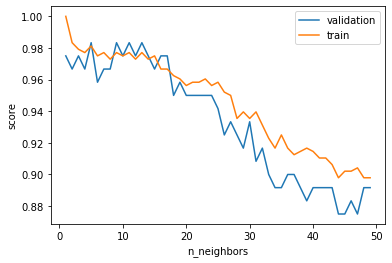

In [52]:
plt.plot(k,val_score.mean(axis=1), label= 'validation')
plt.plot(k,train_score.mean(axis=1), label= 'train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [61]:
param_grid={'n_neighbors': np.arange(1,20), 'metric':['euclidean','manhattan']}

In [62]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)
grid.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
grid.best_score_

0.9833333333333334

In [64]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [65]:
model=grid.best_estimator_

In [70]:
model.score(X_test,Y_test)

0.9333333333333333

In [71]:
confusion_matrix(Y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

In [1]:
N, train_score, val_score=learning_curve(model, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0,10), cv=10)

NameError: name 'learning_curve' is not defined

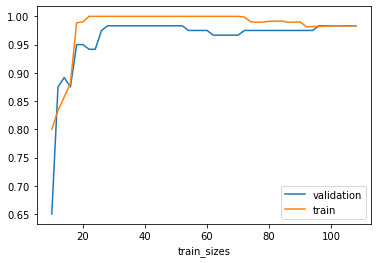

In [85]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()